In [1]:
#SITARAM DUBAGUNTA PC 50 240911624

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'bollywood.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# 1.	Movies & Genres 

###   :  How many movies got released in each genre? 

In [2]:
genre_counts = data['Genre'].value_counts()

print(f"Genre counts are \n {genre_counts}")

Genre counts are 
 Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64


### 2.  Which genre had highest number of releases?  

The genre with the highest number of releases is Comedy with 36 movies.


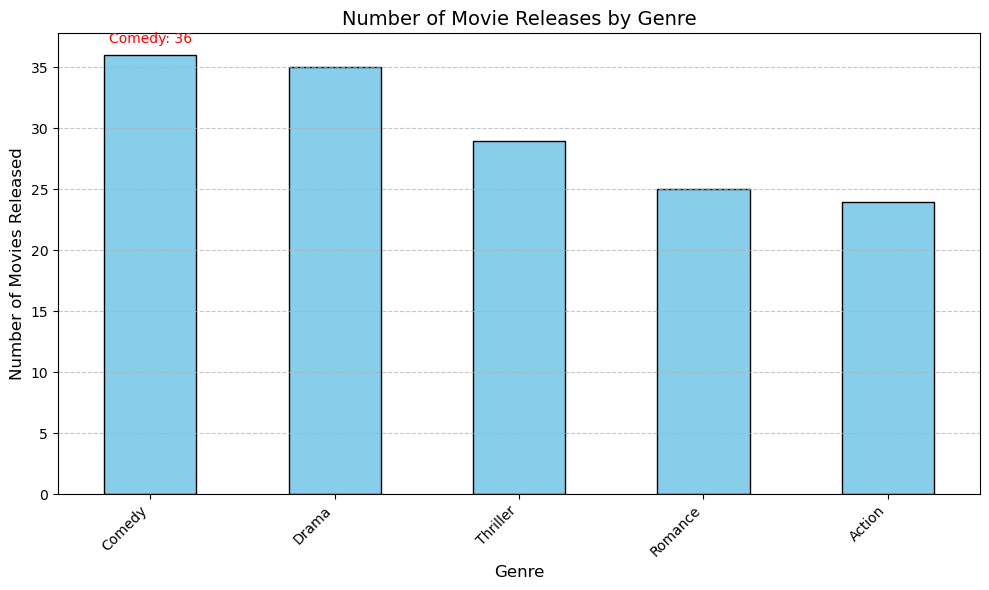

In [12]:
# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Clean the Genre column (remove extra spaces and handle missing values if any)
data['Genre'] = data['Genre'].str.strip()

# Count the number of movies released for each genre
genre_counts = data['Genre'].value_counts()

# Find the genre with the highest number of releases
most_released_genre = genre_counts.idxmax()
most_released_count = genre_counts.max()
print(f"The genre with the highest number of releases is {most_released_genre} with {most_released_count} movies.")

# Plot the graph
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Movie Releases by Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies Released', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Highlight the genre with the highest number of releases
plt.text(genre_counts.index.get_loc(most_released_genre), most_released_count + 1,
         f'{most_released_genre}: {most_released_count}', fontsize=10, color='red', ha='center')

# Show the plot
plt.show()

### 3. How many movies in each genre got released in different release times ?

In [4]:

# Count the number of movies released in each genre during different release times
release_time_counts = data.groupby(['Genre', 'ReleaseTime']).size().unstack(fill_value=0)



# Display the results
print("Movies in each genre by release times:")
print(release_time_counts)



Movies in each genre by release times:
ReleaseTime  FS  HS  LW   N
Genre                      
 Drama        4   6   1  24
Action        3   3   3  12
Action        0   0   0   3
Comedy        3   5   5  23
Romance       3   3   4  15
Thriller      4   1   1  20
Thriller      0   0   1   2


# 2. Box Office 

Which month of the year the maximum number of movie releases are seen?  

Movies released in each month:
1     20
2     16
3     19
4     11
5     18
6     10
7     16
8      8
9     10
10     9
11    10
12     2
Name: ReleaseMonth, dtype: int64

The month with the maximum number of movie releases is 1 with 20 movies.


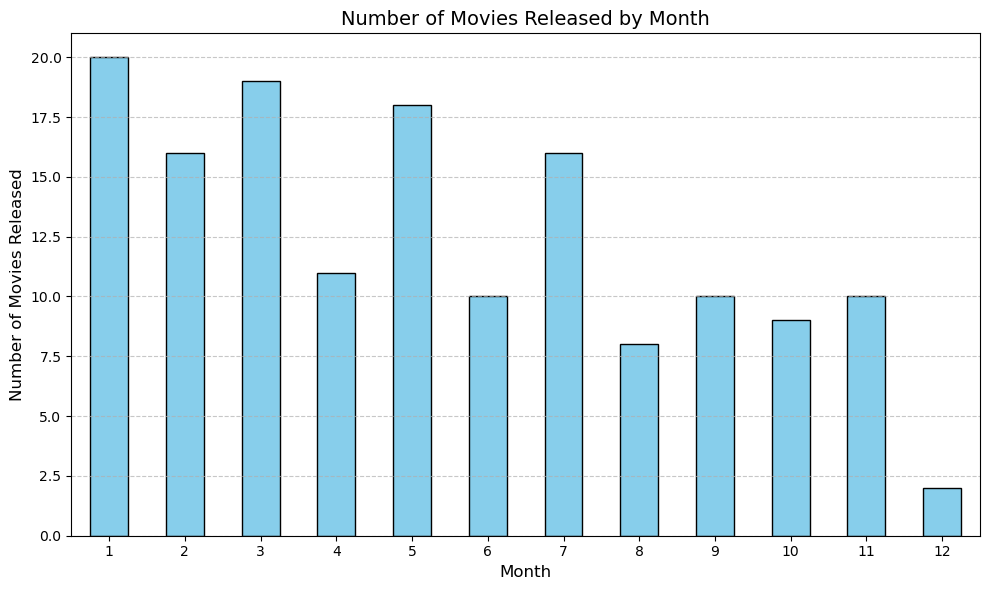

In [10]:

# Convert 'Release Date' column to datetime
data['Release Date'] = pd.to_datetime(data['Release Date'], format='%d-%b-%y', errors='coerce')

# Extract the release month and count occurrences
data['ReleaseMonth'] = data['Release Date'].dt.month
month_counts = data['ReleaseMonth'].value_counts().sort_index()

# Identify the month with the maximum releases
max_month = month_counts.idxmax()
max_count = month_counts.max()

# Display the results
print("Movies released in each month:")
print(month_counts)
print(f"\nThe month with the maximum number of movie releases is {max_month} with {max_count} movies.")

# Plot the graph
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Movies Released by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Movies Released', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


Which month of the year typically sees most releases of high-budgeted movies, that is, movies with a budget of 25 crore or more? 

In [6]:


# Ensure the Release Date column is parsed as datetime
data['Release Date'] = pd.to_datetime(data['Release Date'], format='%d-%b-%y', errors='coerce')

# Filter for high-budget movies (Budget > 25 crores)
high_budget_movies = data[data['Budget'] > 25]

# Print movies with budget greater than 25 crores
print("Movies with budget greater than 25 crores:")
print(high_budget_movies[['MovieName', 'Budget', 'Release Date']])


Movies with budget greater than 25 crores:
                       MovieName  Budget Release Date
0                       2 States      36   2014-04-18
6                  Daawat-E-Ishq      30   2014-09-19
7     Matru Ki Bijlee Ka Mandola      33   2013-01-11
8                   Dedh Ishqiya      31   2014-01-10
10                   Dishkiyaoon      28   2014-03-28
..                           ...     ...          ...
138                         Baby      60   2015-01-23
141                    Shamitabh      40   2015-02-06
142                          Roy      40   2015-02-13
146  Dilliwali Zaalim Girlfriend      32   2015-03-20
148                Kochadaiiyaan     150   2014-05-23

[62 rows x 3 columns]


. Do movies have higher ROI if released on festive seasons or long weekends? Calculate the average ROI for different release times

Average ROI for different release times:
ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64


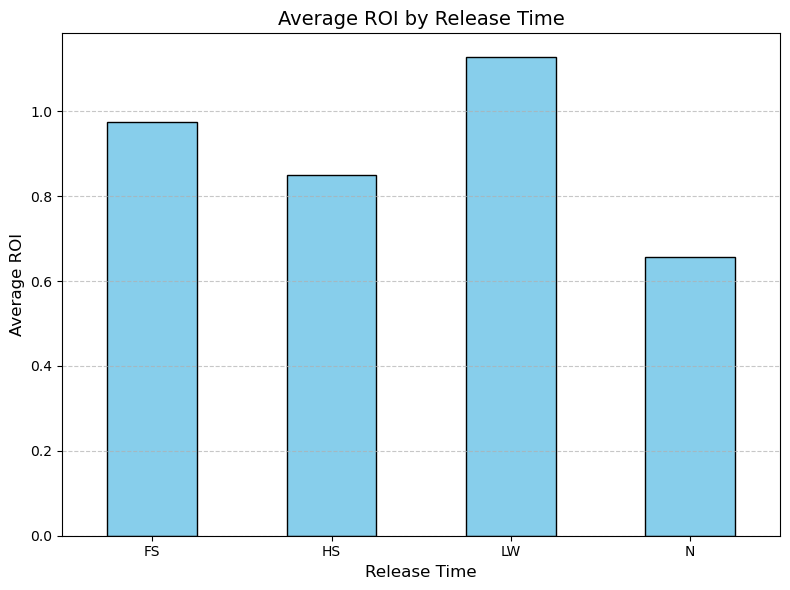

In [7]:
# Ensure Budget and BoxOfficeCollection columns are numeric
data['Budget'] = pd.to_numeric(data['Budget'], errors='coerce')
data['BoxOfficeCollection'] = pd.to_numeric(data['BoxOfficeCollection'], errors='coerce')

# Calculate ROI for each movie
data['ROI'] = (data['BoxOfficeCollection'] - data['Budget']) / data['Budget']

# Calculate the average ROI for different release times
average_roi = data.groupby('ReleaseTime')['ROI'].mean()

# Display the average ROI
print("Average ROI for different release times:")
print(average_roi)

# Plot the average ROI for different release times
plt.figure(figsize=(8, 6))
average_roi.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average ROI by Release Time', fontsize=14)
plt.xlabel('Release Time', fontsize=12)
plt.ylabel('Average ROI', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

6. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.. 

Top 10 movies with maximum ROI:
                     MovieName       ROI  BoxOfficeCollection  Budget
64                  Aashiqui 2  8.166667                110.0      12
89                          PK  7.647059                735.0      85
132                Grand Masti  7.514286                298.0      35
135               The Lunchbox  7.500000                 85.0      10
87                      Fukrey  6.240000                 36.2       5
58                    Mary Kom  5.933333                104.0      15
128                     Shahid  5.666667                 40.0       6
37   Humpty Sharma Ki Dulhania  5.500000                130.0      20
101         Bhaag Milkha Bhaag  4.466667                164.0      30
115            Chennai Express  4.266667                395.0      75


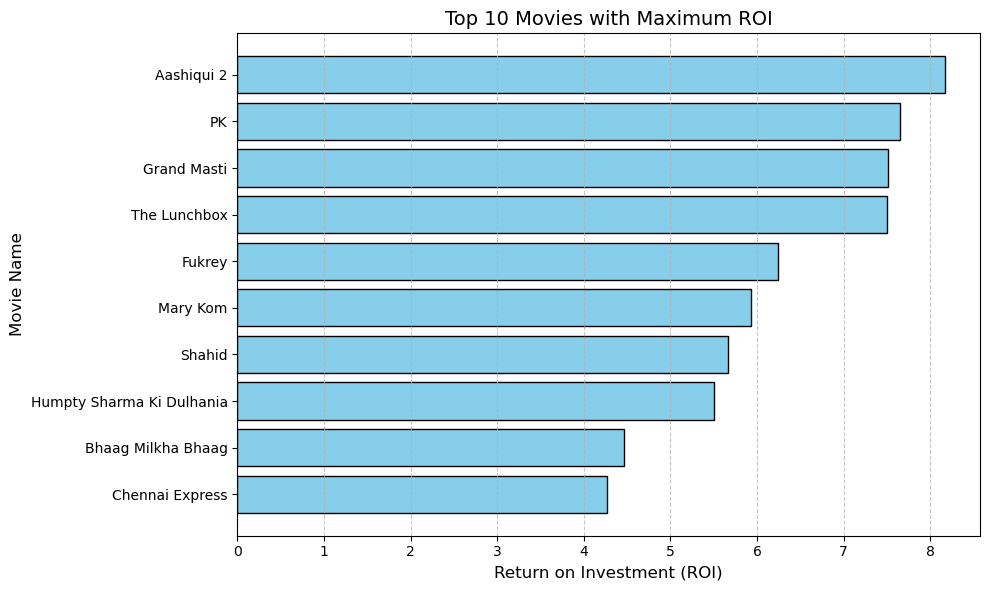

In [9]:


# Strip whitespace from column names to ensure proper matching
data.columns = data.columns.str.strip()

# Convert Budget and BoxOfficeCollection to numeric values for calculation
data['Budget'] = pd.to_numeric(data['Budget'], errors='coerce')
data['BoxOfficeCollection'] = pd.to_numeric(data['BoxOfficeCollection'], errors='coerce')

# Calculate ROI for each movie
data['ROI'] = (data['BoxOfficeCollection'] - data['Budget']) / data['Budget']

# Sort the movies by ROI in descending order and select the top 10
top_10_movies = data.nlargest(10, 'ROI')[['MovieName', 'ROI', 'BoxOfficeCollection', 'Budget']]

# Display the top 10 movies
print("Top 10 movies with maximum ROI:")
print(top_10_movies)

# Plot the graph for top 10 movies
plt.figure(figsize=(10, 6))
plt.barh(top_10_movies['MovieName'], top_10_movies['ROI'], color='skyblue', edgecolor='black')
plt.title('Top 10 Movies with Maximum ROI', fontsize=14)
plt.xlabel('Return on Investment (ROI)', fontsize=12)
plt.ylabel('Movie Name', fontsize=12)
plt.gca().invert_yaxis()  # To show the highest ROI at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


# 3. Social Media: 

Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?  

In [11]:
# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Ensure 'BoxOfficeCollection' and 'YoutubeLikes' columns are numeric
data['BoxOfficeCollection'] = pd.to_numeric(data['BoxOfficeCollection'], errors='coerce')
data['YoutubeLikes'] = pd.to_numeric(data['YoutubeLikes'], errors='coerce')

# Drop rows with missing values in these columns
data = data.dropna(subset=['BoxOfficeCollection', 'YoutubeLikes'])

# Calculate correlation coefficient
correlation = data['BoxOfficeCollection'].corr(data['YoutubeLikes'])

# Display the results
print(f"The correlation coefficient between Box Office Collection and YouTube Likes is: {correlation:.2f}")

# Interpret the correlation
if correlation > 0:
    print("The correlation is positive: higher YouTube likes tend to associate with higher box office collections.")
elif correlation < 0:
    print("The correlation is negative: higher YouTube likes tend to associate with lower box office collections.")
else:
    print("There is no significant correlation.")

The correlation coefficient between Box Office Collection and YouTube Likes is: 0.68
The correlation is positive: higher YouTube likes tend to associate with higher box office collections.


Which genre of movies typically sees more YouTube likes? 

Average YouTube Likes by Genre:
Genre
Action      16744.708333
Drama        7973.628571
Romance      7089.640000
Thriller     4941.793103
Comedy       4784.722222
Name: YoutubeLikes, dtype: float64

The genre with the highest average YouTube likes is Action with an average of 16744.71 likes.


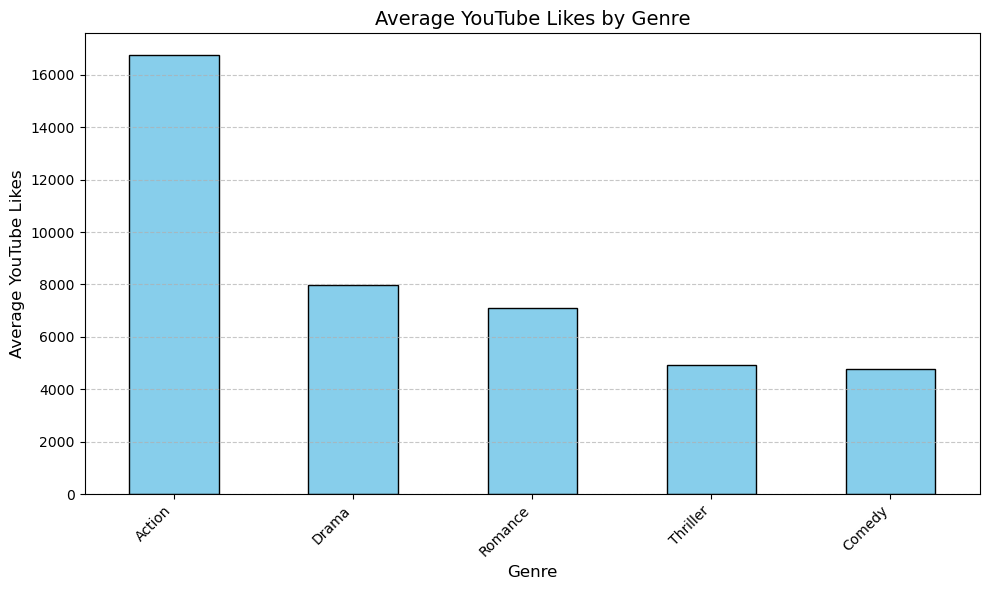

In [14]:
# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Ensure 'Genre' and 'YoutubeLikes' columns are clean
data['Genre'] = data['Genre'].str.strip()
data['YoutubeLikes'] = pd.to_numeric(data['YoutubeLikes'], errors='coerce')

# Group by genre and calculate the average YouTube likes
average_likes_by_genre = data.groupby('Genre')['YoutubeLikes'].mean().sort_values(ascending=False)

# Display the genre with the highest average YouTube likes
most_liked_genre = average_likes_by_genre.idxmax()
highest_avg_likes = average_likes_by_genre.max()

print("Average YouTube Likes by Genre:")
print(average_likes_by_genre)
print(f"\nThe genre with the highest average YouTube likes is {most_liked_genre} with an average of {highest_avg_likes:.2f} likes.")

# Plot the graph
plt.figure(figsize=(10, 6))
average_likes_by_genre.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average YouTube Likes by Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average YouTube Likes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

Draw boxplots for each genre of films to compare

<Figure size 1200x800 with 0 Axes>

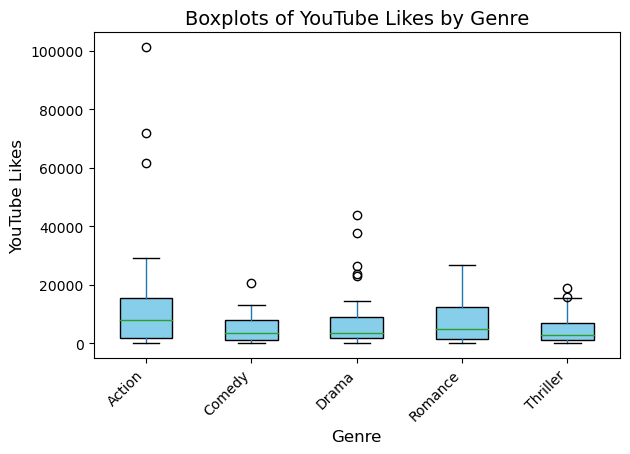

In [15]:
# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Ensure 'Genre' and the relevant numeric columns are clean
data['Genre'] = data['Genre'].str.strip()
data['YoutubeLikes'] = pd.to_numeric(data['YoutubeLikes'], errors='coerce')  # Replace 'YoutubeLikes' with any column you'd like to compare
data['BoxOfficeCollection'] = pd.to_numeric(data['BoxOfficeCollection'], errors='coerce')  # Optional for other attributes

# Drop rows with missing or invalid data
data = data.dropna(subset=['Genre', 'YoutubeLikes'])

# Create boxplots for YouTube likes for each genre
plt.figure(figsize=(12, 8))
data.boxplot(column='YoutubeLikes', by='Genre', grid=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.title('Boxplots of YouTube Likes by Genre', fontsize=14)
plt.suptitle('')  # Remove automatic title from pandas
plt.xlabel('Genre', fontsize=12)
plt.ylabel('YouTube Likes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Which variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated?
________________________________________


Correlation matrix:
                       Budget  BoxOfficeCollection  YoutubeViews  \
Budget               1.000000             0.650401      0.589038   
BoxOfficeCollection  0.650401             1.000000      0.588632   
YoutubeViews         0.589038             0.588632      1.000000   
YoutubeLikes         0.608916             0.682517      0.884055   
YoutubeDislikes      0.665343             0.623941      0.846739   

                     YoutubeLikes  YoutubeDislikes  
Budget                   0.608916         0.665343  
BoxOfficeCollection      0.682517         0.623941  
YoutubeViews             0.884055         0.846739  
YoutubeLikes             1.000000         0.859730  
YoutubeDislikes          0.859730         1.000000  


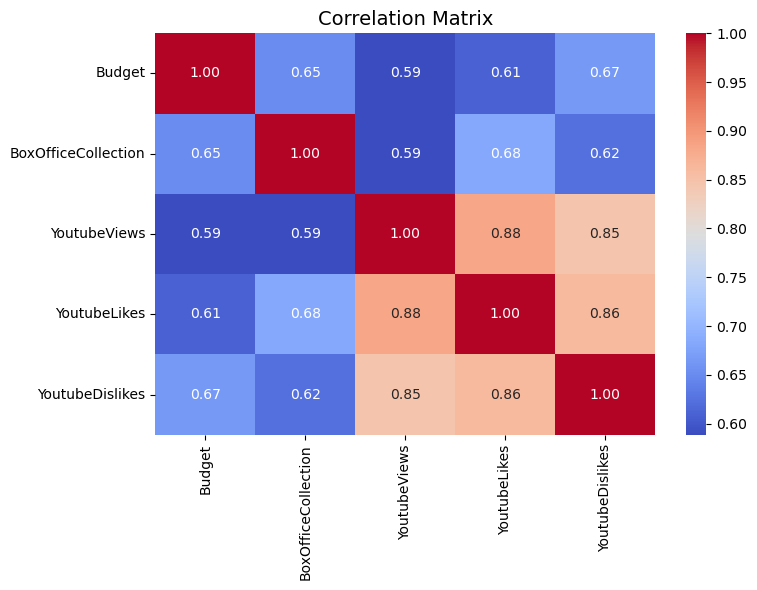

In [17]:



# Ensure relevant columns are numeric
numeric_columns = ['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']
for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Drop rows with missing values in the selected columns
data = data.dropna(subset=numeric_columns)

# Calculate the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Display the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()